# Decision Tree

In addition to the model using logistic regression to predict the outcome of an animal, we also wanted to gain some further insight into which features of the animals influence the outcome.
For this purpose we decided to use a decision tree because it offers a very nice way to visualize how the animals are classifed and the results can be interpreted easily.
When training the decision tree we used cross validation to tune many of the possible hyperparameters (see the section on training), however for some of the hyperparamters, e.g. the minimal number of animals per leaf, we used the deafult parameters because they already give sensible results.
The maximal depth of the tree was set to 5 because this prevents the model from becoming too convolved and it makes sure that the results generalize well.

In [1]:
import numpy as np
import pandas as pd
from sklearn import model_selection, svm, preprocessing, metrics, ensemble, tree
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## load  and prepare data

In [3]:
#read in the data with numerical features
data = pd.read_csv('data/transformed_data_num.csv',index_col=0)
data.dropna(inplace=True)

In [4]:
data.head(10)

,outcometype,animaltype,sex,age,neutralized,colormix,breedmix,apricot,black,black.1,black brindle,black smoke,black tabby,blue,blue cream,blue merle,blue point,blue smoke,blue tabby,blue tick,blue tiger,brown,brown brindle,brown merle,brown tabby,buff,calico,calico point,chocolate,chocolate point,cream,cream tabby,fawn,flame point,gold,gray,gray tabby,lilac point,liver,lynx point,orange,orange tabby,red,red merle,red tick,sable,seal point,silver,silver tabby,tan,torbie,tortie,tortie point,tricolor,white,yellow,yellow brindle,affenpinscher mix,akita,akita mix,alaskan husky,alaskan husky mix,alaskan malamute,american bulldog,american bulldog mix,american pit bull terrier,american pit bull terrier mix,american shorthair mix,american staffordshire terrier,american staffordshire terrier mix,anatol shepherd,anatol shepherd mix,angora mix,australian cattle dog,australian cattle dog mix,australian kelpie,australian kelpie mix,australian shepherd,australian shepherd mix,basenji,basenji mix,basset hound,basset hound mix,beagle,beagle mix,beauceron mix,belgian malinois mix,bernard smooth coat mix,bernese mountain dog mix,bichon frise mix,black.2,black.3,black mouth cur,black mouth cur mix,bloodhound mix,blue lacy,blue lacy mix,border collie,border collie mix,border terrier,border terrier mix,boston terrier,boston terrier mix,boxer,boxer mix,brittany mix,bruss griffon,bruss griffon mix,bull terrier,bull terrier mix,bulldog mix,bullmastiff mix,cairn terrier,cairn terrier mix,cardigan welsh corgi,cardigan welsh corgi mix,carolina dog,carolina dog mix,catahoula,catahoula mix,cavalier span mix,chesa bay retr mix,chihuahua longhair,chihuahua longhair mix,chihuahua shorthair,chihuahua shorthair mix,chinese sharpei,chinese sharpei mix,chow chow,chow chow mix,cocker spaniel,cocker spaniel mix,collie rough,collie rough mix,collie smooth,collie smooth mix,dachshund,dachshund longhair,dachshund longhair mix,dachshund mix,dachshund wirehair,dachshund wirehair mix,dalmatian,dalmatian mix,doberman pinsch,doberman pinsch mix,dogo argentino mix,domestic longhair,domestic longhair mix,domestic medium hair,domestic medium hair mix,domestic shorthair,domestic shorthair mix,dutch shepherd mix,english bulldog,english bulldog mix,english pointer mix,feist mix,finnish spitz mix,flat coat retriever,flat coat retriever mix,french bulldog mix,german shepherd,german shepherd mix,german shorthair pointer mix,golden retriever,golden retriever mix,great dane,great dane mix,great pyrenees,great pyrenees mix,greyhound,greyhound mix,harrier,harrier mix,havanese mix,himalayan mix,italian greyhound mix,jack russell terrier,jack russell terrier mix,japanese bobtail mix,labrador retriever,labrador retriever mix,landseer mix,leonberger mix,lhasa apso,lhasa apso mix,maine coon mix,maltese,maltese mix,manchester terrier,manchester terrier mix,manx mix,mastiff,mastiff mix,miniature pinscher,miniature pinscher mix,miniature poodle,miniature poodle mix,miniature schnauzer,miniature schnauzer mix,newfoundland,norfolk terrier,norfolk terrier mix,norwich terrier mix,papillon,papillon mix,parson russell terrier mix,pbgv,pbgv mix,pekingese,pekingese mix,pembroke welsh corgi,pembroke welsh corgi mix,persian mix,pharaoh hound mix,pit bull,pit bull mix,plott hound,plott hound mix,pointer,pointer mix,pomeranian,pomeranian mix,pug,pug mix,queensland heeler,queensland heeler mix,ragdoll mix,rat terrier,rat terrier mix,redbone hound mix,rhod ridgeback,rhod ridgeback mix,rottweiler,rottweiler mix,russian blue mix,schipperke mix,shetland sheepdog,shetland sheepdog mix,shiba inu mix,shih tzu,shih tzu mix,siamese,siamese mix,siberian husky,siberian husky mix,silky terrier mix,smooth fox terrier mix,snowshoe mix,soft coated wheaten terrier,soft coated wheaten terrier mix,st,staffordshire,staffordshire mix,standard poodle,standard poodle mix,standard schnauzer mix,tibetan terrier mix,toy fox terrier mix,toy poodle,toy poodle mix,treeing walker coonhound mix,vizsla,vizsla mix,weimaraner,weimaraner m

In [5]:
#prepare data
X = np.array(data.drop('outcometype',axis=1))
Y = np.array(data.outcometype)

x_train, x_test, y_train, y_test = model_selection.train_test_split(X,Y,train_size=0.7)

## train the model

In [6]:
#search a good model
tr = tree.DecisionTreeClassifier()

param_dict = {'max_depth':[5], 'criterion':["gini", "entropy"], 'max_features':['auto', None], 
              'splitter':['best', 'random']}

clf = model_selection.GridSearchCV(tr, param_grid = param_dict, n_jobs = -1)

clf.fit(x_train,y_train)

print(clf.best_score_)
print(clf.best_params_)

results = pd.DataFrame(clf.cv_results_)

results

0.6228645713810003
{'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'splitter': 'random'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.146964,0.004109,0.015386,0.002076,gini,5,auto,best,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.430564,0.598663,0.431270,0.489683,0.490264,0.488089,0.061272,5
1,0.153167,0.010301,0.015263,0.003438,gini,5,auto,random,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.467170,0.443766,0.427492,0.429817,0.443185,0.442286,0.014118,8
2,0.765744,0.013971,0.018424,0.001879,gini,5,None,best,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.610401,0.619006,0.626562,0.625981,0.618715,0.620133,0.005891,4
3,0.725604,0.020809,0.016984,0.002136,gini,5,None,random,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.608948,0.623365,0.624818,0.629759,0.621912,0.621761,0.006929,3
4,0.164097,0.007442,0.014614,0.002906,entropy,5,auto,best,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.442475,0.430108,0.441151,0.489974,0.454519,0.451645,0.020666,7
5,0.161325,0.005801,0.015187,0.002586,entropy,5,auto,random,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.465137,0.440279,0.433885,0.600697,0.443766,0.476753,0.062854,6
6,0.793353,0.014204,0.017070,0.000715,entropy,5,None,best,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.610982,0.620750,0.628015,0.627143,0.625400,0.622458,0.006263,2
7,0.544382,0.170193,0.011053,0.001805,entropy,5,None,random,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.615049,0.620169,0.630049,0.627434,0.621622,0.622865,0.005336,1


## results

In the confusion matrices below one can see that the model makes some mispredictions, especially regarding the rare labels 'died' and 'euthanasia', but it also has a hard time with differentiating 'adoption' from 'transfer' and 'return'.
The overall accuracy scores on the training and testing data however are not bad and since they are very similar this means that the results generalize very well.
The plot of the decision tree (its best to view the pdf file) gives some hints as to what influences the outcome of the individual animals.

In [7]:
#training score
clf.score(x_train,y_train)

0.6248982912937348

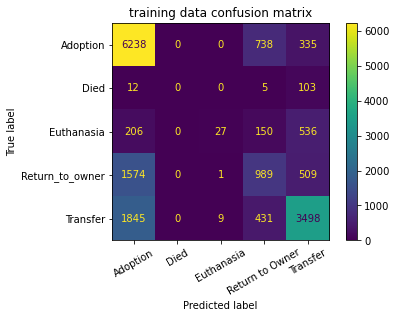

In [8]:
fig,ax = plt.subplots()
metrics.ConfusionMatrixDisplay.from_estimator(clf,x_train,y_train,ax=ax)
ax.set_title('training data confusion matrix')
ax.set_xticklabels(labels=['Adoption','Died','Euthanasia','Return to Owner','Transfer'],rotation=30)
plt.show()

In [9]:
#testing score
clf.score(x_test,y_test)

0.6320857065364796

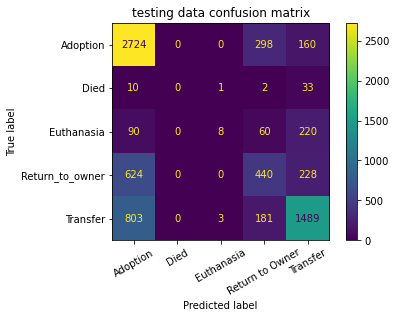

In [10]:
fig,ax = plt.subplots()
metrics.ConfusionMatrixDisplay.from_estimator(clf,x_test,y_test,ax=ax)
ax.set_title('testing data confusion matrix')
ax.set_xticklabels(labels=['Adoption','Died','Euthanasia','Return to Owner','Transfer'],rotation=30)
plt.show()

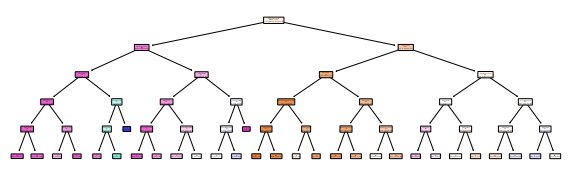

In [11]:
#plot the tree
fig = plt.figure(figsize=(10,3))
tree.plot_tree(clf.best_estimator_,feature_names=data.columns[1:] ,rounded=True, filled =True, 
               impurity=False, label='root', class_names=['Adoption', 'Died', 'Euthanasia', 'Return', 'Transfer'])
plt.show()
#fig.savefig('tree.pdf')